## Assignment 1a: Machine Learning Methods

### Vineeth Marikuntematha Ravisharadhya a1896845

#### How can we use data analytics to predict energy usage for this house?

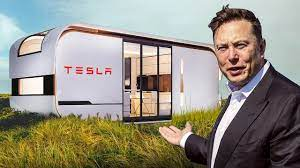

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [61]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
poenerg_data = pd.read_csv("energydata_complete.csv")

poenerg_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27/05/2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27/05/2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27/05/2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27/05/2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


### 2. Analyse and visualise the data

### Checking for null data in the dataset

In [63]:
poenerg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [64]:
poenerg_data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [65]:
poenerg_data.shape

(19735, 29)

In [66]:
poenerg_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [67]:
poenerg_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [68]:
poenerg_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [69]:
poenerg_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,19725,19726,19727,19728,19729,19730,19731,19732,19733,19734
date,11/01/2016 17:00,11/01/2016 17:10,11/01/2016 17:20,11/01/2016 17:30,11/01/2016 17:40,11/01/2016 17:50,11/01/2016 18:00,11/01/2016 18:10,11/01/2016 18:20,11/01/2016 18:30,...,27/05/2016 16:30,27/05/2016 16:40,27/05/2016 16:50,27/05/2016 17:00,27/05/2016 17:10,27/05/2016 17:20,27/05/2016 17:30,27/05/2016 17:40,27/05/2016 17:50,27/05/2016 18:00
Appliances,60,60,50,50,60,50,60,60,60,70,...,220,180,120,110,90,100,90,270,420,430
lights,30,30,30,40,40,40,50,50,40,40,...,0,0,0,0,0,0,0,10,10,10
T1,19.89,19.89,19.89,19.89,19.89,19.89,19.89,19.856667,19.79,19.856667,...,25.426667,25.5,25.5,25.6,25.533333,25.566667,25.5,25.5,25.5,25.5
RH_1,47.596667,46.693333,46.3,46.066667,46.333333,46.026667,45.766667,45.56,45.5975,46.09,...,46.06,46.53,47.456667,47.193333,46.86,46.56,46.5,46.596667,46.99,46.6
T2,19.2,19.2,19.2,19.2,19.2,19.2,19.2,19.2,19.2,19.23,...,26.0,26.0,26.0,25.968571,25.978,25.89,25.754,25.628571,25.414,25.264286
RH_2,44.79,44.7225,44.626667,44.59,44.53,44.5,44.5,44.5,44.433333,44.4,...,41.7,41.725714,42.32,42.528571,42.534,42.025714,42.08,42.768571,43.036,42.971429
T3,19.79,19.79,19.79,19.79,19.79,19.79,19.79,19.73,19.73,19.79,...,28.0,27.856667,27.663333,27.39,27.323333,27.2,27.133333,27.05,26.89,26.823333
RH_3,44.73,44.79,44.933333,45.0,45.0,44.933333,44.9,44.9,44.79,44.863333,...,40.76,40.5,40.693333,41.03,41.09,41.163333,41.223333,41.69,41.29,41.156667
T4,19.0,19.0,18.926667,18.89,18.89,18.89,18.89,18.89,18.89,18.89,...,24.7,24.7,24.7,24.7,24.7,24.7,24.7,24.7,24.7,24.7


In [70]:
poenerg_data['date'] = pd.to_datetime(poenerg_data['date'], format='%d/%m/%Y %H:%M')
print(poenerg_data['date'])

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: date, Length: 19735, dtype: datetime64[ns]


In [71]:
poenerg_data.corr()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,1.000000,-0.009630,-0.189835,0.696974,-0.102760,0.515321,-0.092945,0.792938,-0.431939,0.781954,...,0.888546,-0.244647,0.588852,-0.026770,-0.336362,-0.257415,-0.096214,0.468751,0.000277,0.000277
Appliances,-0.009630,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015357,-0.011145,-0.011145
lights,-0.189835,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,...,-0.157592,-0.008766,-0.074423,-0.010576,0.068543,0.060281,0.020038,-0.036331,0.000521,0.000521
T1,0.696974,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,...,0.844777,0.071756,0.682854,-0.150574,-0.345481,-0.087654,-0.076210,0.571333,-0.006203,-0.006203
RH_1,-0.102760,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,...,0.115263,0.764001,0.340788,-0.293957,0.274126,0.204932,-0.021057,0.639125,-0.000699,-0.000699
T2,0.515321,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,...,0.675535,0.157346,0.792247,-0.133028,-0.505291,0.052495,-0.069721,0.582632,-0.011087,-0.011087
RH_2,-0.092945,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,...,0.054544,0.676467,0.033703,-0.255646,0.584911,0.069190,-0.005368,0.499154,0.006275,0.006275
T3,0.792938,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,...,0.901324,0.134602,0.699420,-0.189974,-0.281718,-0.100776,-0.102310,0.645909,-0.005194,-0.005194
RH_3,-0.431939,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,...,-0.195270,0.833538,0.118237,-0.233274,0.356192,0.263188,0.017041,0.414398,-0.000477,-0.000477
T4,0.781954,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,...,0.889439,-0.025549,0.663479,-0.075292,-0.388602,-0.185747,-0.104768,0.519504,-0.001815,-0.001815


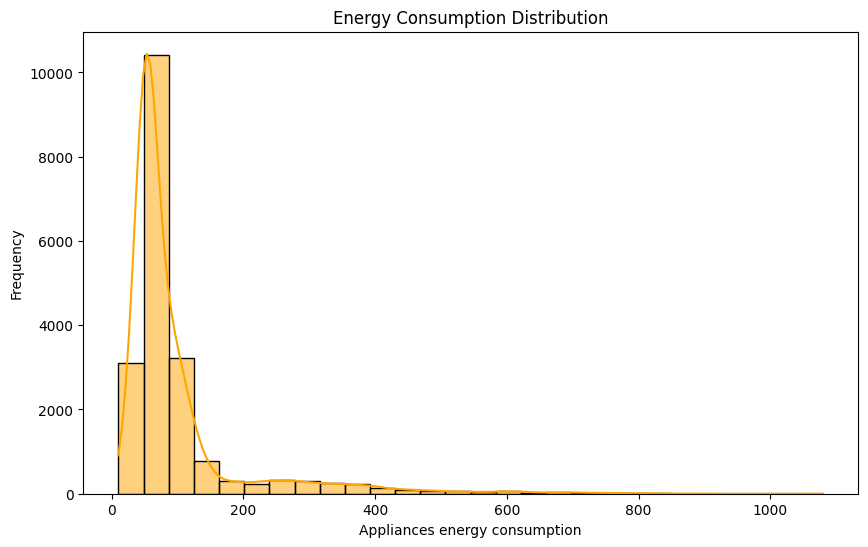

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(poenerg_data['Appliances'], bins=28, kde=True, color='orange')
plt.title('Energy Consumption Distribution')
plt.xlabel('Appliances energy consumption')
plt.ylabel('Frequency')
plt.show()

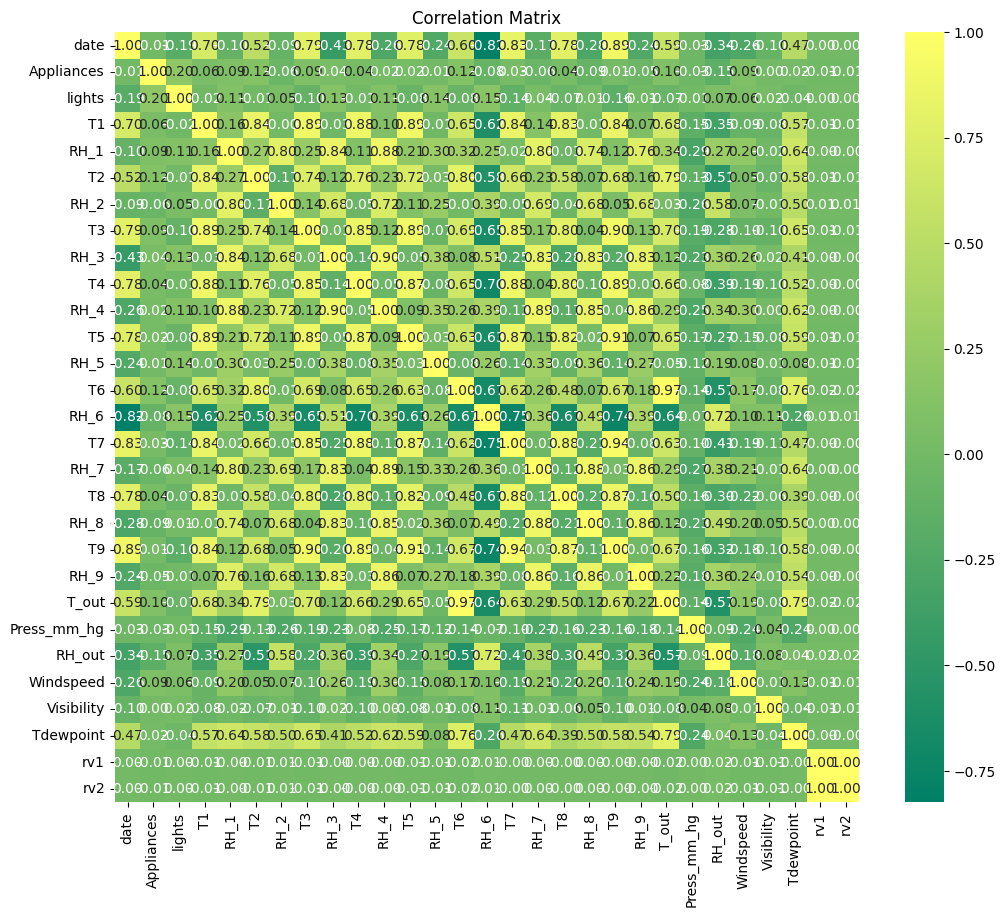

In [73]:
plt.figure(figsize=(12, 10))
corr_matrix = poenerg_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='summer', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### 3. Pre-process the data

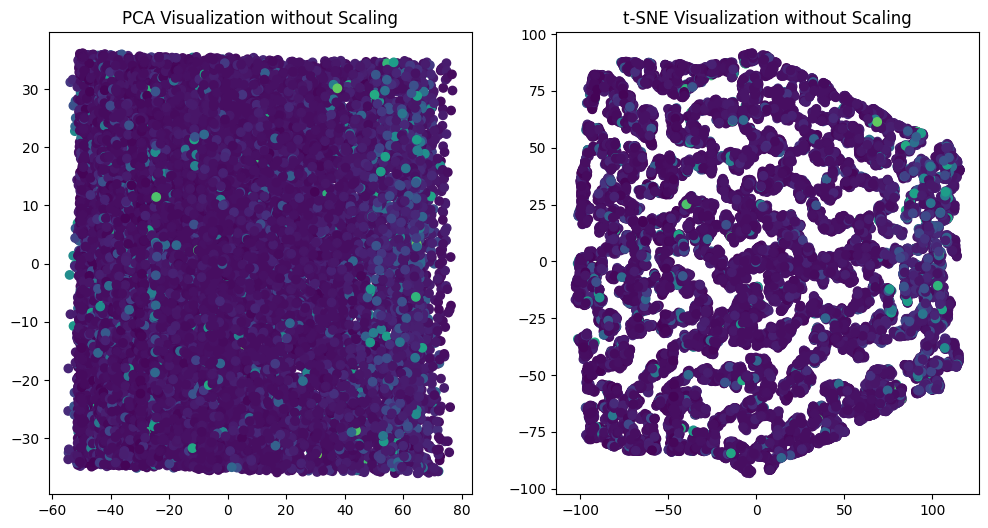

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler




X = poenerg_data.drop(columns=['date', 'Appliances', 'lights'])
y = poenerg_data['Appliances']

# Perform PCA without scaling
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply t-SNE without scaling for further visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Visualize the results without scaling
plt.figure(figsize=(12, 6))

# Plot PCA results without scaling
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Visualization without Scaling')

# Plot t-SNE results without scaling
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Visualization without Scaling')

plt.show()

#### Post PCA and t-SNE techniques along with normalization

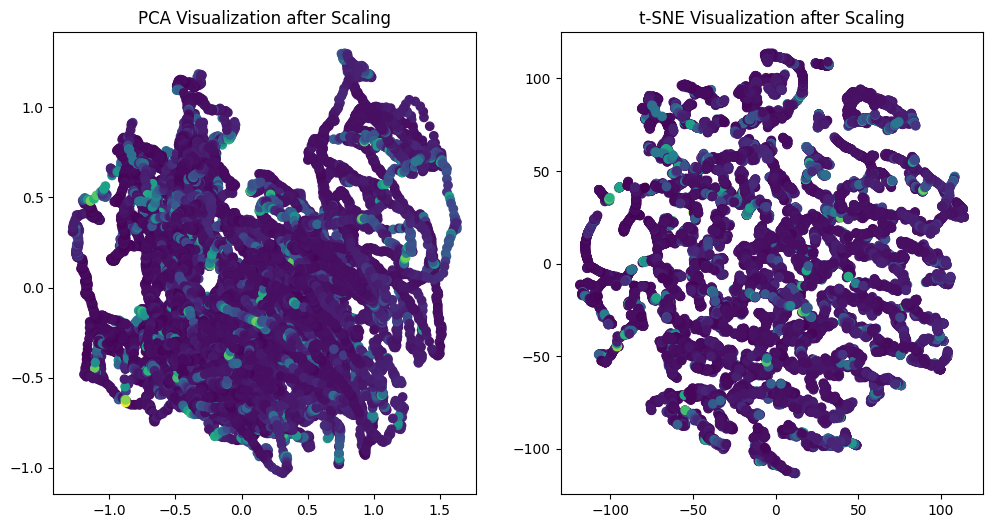

In [91]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


postsc_pca = PCA(n_components=2)
X_scaled_df_pca = postsc_pca.fit_transform(X_scaled_df)


postsc_tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_scaled_df_tsne = postsc_tsne.fit_transform(X_scaled_df_pca)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(X_scaled_df_pca[:, 0], X_scaled_df_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Visualization after Scaling')


plt.subplot(1, 2, 2)
plt.scatter(X_scaled_df_tsne[:, 0], X_scaled_df_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Visualization after Scaling')

plt.show()

### 4. Implement, train and test prediction models

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
pip install pygam

Note: you may need to restart the kernel to use updated packages.


In [79]:
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from pygam import LinearGAM

#### Decision Tree Regression

In [80]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_y_pred))
linear_r2 = r2_score(y_test, linear_y_pred)

In [81]:
print("Model: Linear Regression")
print("RMSE:", linear_rmse)
print("R-squared Score:", linear_r2)
print()

Model: Linear Regression
RMSE: 92.45246574920814
R-squared Score: 0.1458598365133299



#### Decision Tree Regression

In [82]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_y_pred = decision_tree_model.predict(X_test)
decision_tree_rmse = np.sqrt(mean_squared_error(y_test, decision_tree_y_pred))
decision_tree_r2 = r2_score(y_test, decision_tree_y_pred)

In [83]:
print("Model: Decision Tree Regression")
print("RMSE:", decision_tree_rmse)
print("R-squared Score:", decision_tree_r2)
print()

Model: Decision Tree Regression
RMSE: 89.04085937908677
R-squared Score: 0.2077343391357337



#### Bayesian Linear Regression

In [84]:
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
bayesian_y_pred = bayesian_model.predict(X_test)
bayesian_rmse = np.sqrt(mean_squared_error(y_test, bayesian_y_pred))
bayesian_r2 = r2_score(y_test, bayesian_y_pred)

In [85]:
print("Model: Bayesian Linear Regression")
print("RMSE:", bayesian_rmse)
print("R-squared Score:", bayesian_r2)

Model: Bayesian Linear Regression
RMSE: 92.45174891888557
R-squared Score: 0.14587308161588752


#### Generalized Additive Model

In [86]:
gam_model = LinearGAM().fit(X_train, y_train)

# Make predictions
y_pred_gam = gam_model.predict(X_test)

# Evaluate the model
gam_r2 = r2_score(y_test, y_pred_gam)
gam_rmse = mean_squared_error(y_test, y_pred_gam, squared=False)

print("Generalized Additive Model (GAM) Performance:")
print("R-squared Score:", gam_r2)
print("Root Mean Squared Error (RMSE):", gam_rmse)

Generalized Additive Model (GAM) Performance:
R-squared Score: 0.21890995123297619
Root Mean Squared Error (RMSE): 88.41062872006562


### 5. Comparing the results from all candidate models

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

Models_res = pd.DataFrame({
    'Models': ['Linear Regression', 'Decision Tree Regression', 'Bayesian Linear Regression', 'Generalized Additive Model'],
    'RMSE': [linear_rmse, decision_tree_rmse, bayesian_rmse, gam_rmse],
    'R2': [linear_r2, decision_tree_r2, bayesian_r2, gam_r2]
})

print(Models_res)

                       Models       RMSE        R2
0           Linear Regression  92.452466  0.145860
1    Decision Tree Regression  89.040859  0.207734
2  Bayesian Linear Regression  92.451749  0.145873
3  Generalized Additive Model  88.410629  0.218910


#### Model Comparison

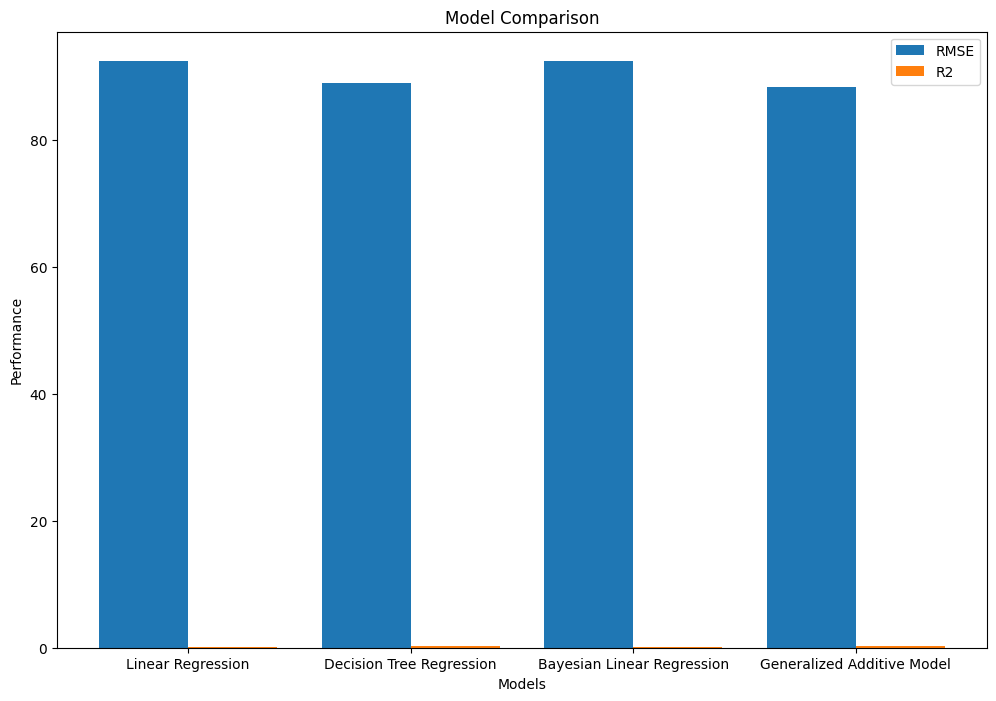

In [88]:
plt.figure(figsize=(12, 8))
plt.bar(Models_res.index, Models_res['RMSE'], width=0.4, label='RMSE')
plt.bar(Models_res.index + 0.4, Models_res['R2'], width=0.4, label='R2')
plt.xlabel('Models')
plt.ylabel('Performance')
plt.title('Model Comparison')
plt.xticks(Models_res.index + 0.2, Models_res['Models'])
plt.legend()
plt.show()

In [89]:
print(Models_res[['RMSE', 'R2']])

        RMSE        R2
0  92.452466  0.145860
1  89.040859  0.207734
2  92.451749  0.145873
3  88.410629  0.218910


#### R-squared Score of Different Models

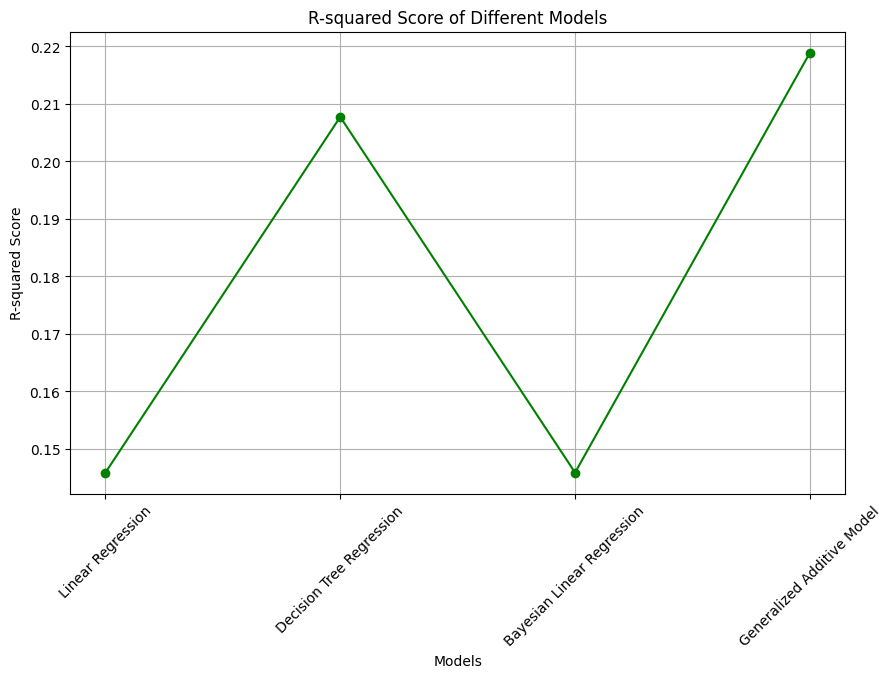

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(Models_res['Models'], Models_res['R2'], marker='o', linestyle='-',color = 'green')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Score of Different Models')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Based upon the results both Linear regression and the Bayesian Linear regression model showed the best results as they implified the same results and have slight decimal difference between them , the values for Linear regression and the Bayesian Linear regression model are  92.452466 and 92.451749 , so in between these two models Linear regression performed well. And the other two also performed well but didnt satisfy as Linear regression and Bayesian Linear regression model.

### 6. Learnings at the end of this assignment and how to improve the models

Through this project or assignment , i have learned how to take take the features and why the dropping of some feature helps in improves the desired output value. In most of the cases existing feature gives clarity on which the target variable should be. Especially , during the model selection the data always needs to be preprocessed, most the things done here are already have been known knowledge to me , as i did deep learning course , most of the techniques used here were used especially the analysing the data and pre processing the data , but in deep learning we mainly considered classification models , here we have used regression models .

### 7. References

I have mainly used code of pre processing data and model training from the week 2 workshop , where it felt more suitable than the paper code, but i have used for reference of paper code 



 i) Candanedo, LM, Feldheim, V & Deramaix, D 2017, ‘Data driven prediction models of energy use of appliances in a low-energy house’, Energy and Buildings, vol. 140, pp. 81–97.
